In [6]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import duckdb
sns.set_style("whitegrid")

In [7]:
# df = pl.read_csv(
#     "all_soil_plasmids_eggnog.emapper.annotations",
#     separator="\t",
#     comment_prefix="##",
# ).with_columns(
#     [
#         (
#             pl.col("#query")
#             .map_elements(
#                 lambda x: (
#                     "_".join(x.split("_")[0:-1])
#                     if "IMGPR" not in x
#                     else x.split("|")[0]
#                 )
#             )
#             .alias("Plasmid")
#         ),
#         (
#             pl.col("#query")
#             .map_elements(
#                 lambda x: (
#                     "Isolate"
#                     if any(i for i in ["IMGPR", "PLSDB", "Refsoil"] if i in x)
#                     else "Meta"
#                 )
#             )
#             .alias("Origin")
#         ),
#         (pl.col("COG_category").str.split("")),
#         (
#             pl.col("#query")
#             .map_elements(
#                 lambda x: (
#                     "_".join(x.split("_")[0:-1])
#                     if any(i for i in ["PLSDB", "Refsoil"] if i in x)
#                     else x.split("_")[2] if "IMGPR" in x else x.split("|")[0]
#                 )
#             )
#             .alias("taxon_oid")
#         ),
#     ]
# )


# df.head()

In [15]:
df

query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2088090014|GPI…","""1382359.JIAL01…",1.3200e-68,241.0,"""COG0507@1|root…","""2|Bacteria""","""L""","""A helicase nuc…","""traI""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""AAA_30,PDDEXK_…"
"""2088090014|GPI…","""1336235.JAEG01…",1.4100e-26,121.0,"""COG0446@1|root…","""28211|Alphapro…","""C""","""NADH:flavin ox…","""tmd""","""-""","""1.5.8.1,1.5.8.…","""ko:K00317""","""ko00680,ko0112…","""-""","""R01588,R02511""","""RC00185,RC0055…","""ko00000,ko0000…","""-""","""-""","""-""","""NAD_binding_8,…"
"""2088090014|GPI…","""1117943.SFHH10…",5.4000e-32,120.0,"""COG1172@1|root…","""28211|Alphapro…","""G""","""Belongs to the…","""rbsCch1""","""-""","""-""","""ko:K10440""","""ko02010,map020…","""M00212""","""-""","""-""","""ko00000,ko0000…","""3.A.1.2.1,3.A.…","""-""","""-""","""BPD_transp_2"""
"""2088090014|GPI…","""375286.mma_174…",1.6600e-16,79.7,"""COG4644@1|root…","""28216|Betaprot…","""L""","""Tn3 transposas…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""DDE_Tnp_Tn3,DU…"
"""2088090014|GPI…","""1869.MB27_2338…",5.0700e-7,55.8,"""COG0631@1|root…","""201174|Actinob…","""T""","""Serine/threoni…","""-""","""-""","""3.1.3.16""","""ko:K20074""","""-""","""-""","""-""","""-""","""ko00000,ko0100…","""-""","""-""","""-""","""PP2C_2"""
"""2088090014|GPI…","""96561.Dole_171…",2.0500e-11,65.1,"""COG0272@1|root…","""28221|Deltapro…","""L""","""DNA ligase tha…","""ligA""","""GO:0003674,GO:…","""6.5.1.2""","""ko:K01972""","""ko03030,ko0341…","""-""","""R00382""","""RC00005""","""ko00000,ko0000…","""-""","""-""","""-""","""BRCT,DNA_ligas…"
"""2088090014|GPI…","""1306990.BARG01…",2.1800e-10,62.0,"""2DR88@1|root,3…","""201174|Actinob…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""2088090014|GPI…","""106370.Francci…",3.3500e-19,80.5,"""2C7CU@1|root,3…","""201174|Actinob…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""2088090014|GPI…","""469383.Cwoe_24…",7.4400e-16,73.6,"""2E8MQ@1|root,3…","""201174|Actinob…","""S""","""Ribbon-helix-h…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""RHH_1"""


In [19]:
with duckdb.connect('../soil_plasmid.db') as con:
    df = con.sql("SELECT * FROM eggnog").pl()

df = (
    df
    .with_columns(pl.col("COG_category").fill_null(pl.lit("-")))
    .with_columns(
        [
            (
                pl.col("query")
                .map_elements(
                    lambda x: (
                        "_".join(x.split("_")[0:-1])
                        if "IMGPR" not in x
                        else x.split("|")[0]
                    )
                )
                .alias("Plasmid")
            ),
            (
                pl.col("query")
                .map_elements(
                    lambda x: (
                        "Isolate"
                        if any(i for i in ["IMGPR", "PLSDB", "Refsoil"] if i in x)
                        else "Meta"
                    )
                )
                .alias("Origin")
            ),
            (pl.col("COG_category").str.split(" ")),
            (
                pl.col("query")
                .map_elements(
                    lambda x: (
                        "_".join(x.split("_")[0:-1])
                        if any(i for i in ["PLSDB", "Refsoil"] if i in x)
                        else x.split("_")[2] if "IMGPR" in x else x.split("|")[0]
                    )
                )
                .alias("taxon_oid")
            ),
        ]
    )
)


df.head()

query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,Plasmid,Origin,taxon_oid
str,str,f64,f64,str,str,list[str],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2088090014|GPI…","""1382359.JIAL01…",1.3200e-68,241.0,"""COG0507@1|root…","""2|Bacteria""","[""L""]","""A helicase nuc…","""traI""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""AAA_30,PDDEXK_…","""2088090014|GPI…","""Meta""","""2088090014"""
"""2088090014|GPI…","""1336235.JAEG01…",1.4100e-26,121.0,"""COG0446@1|root…","""28211|Alphapro…","[""C""]","""NADH:flavin ox…","""tmd""","""-""","""1.5.8.1,1.5.8.…","""ko:K00317""","""ko00680,ko0112…","""-""","""R01588,R02511""","""RC00185,RC0055…","""ko00000,ko0000…","""-""","""-""","""-""","""NAD_binding_8,…","""2088090014|GPI…","""Meta""","""2088090014"""
"""2088090014|GPI…","""1117943.SFHH10…",5.4000e-32,120.0,"""COG1172@1|root…","""28211|Alphapro…","[""G""]","""Belongs to the…","""rbsCch1""","""-""","""-""","""ko:K10440""","""ko02010,map020…","""M00212""","""-""","""-""","""ko00000,ko0000…","""3.A.1.2.1,3.A.…","""-""","""-""","""BPD_transp_2""","""2088090014|GPI…","""Meta""","""2088090014"""
"""2088090014|GPI…","""375286.mma_174…",1.6600e-16,79.7,"""COG4644@1|root…","""28216|Betaprot…","[""L""]","""Tn3 transposas…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""DDE_Tnp_Tn3,DU…","""2088090014|GPI…","""Meta""","""2088090014"""
"""2088090014|GPI…","""1869.MB27_2338…",5.0700e-7,55.8,"""COG0631@1|root…","""201174|Actinob…","[""T""]","""Serine/threoni…","""-""","""-""","""3.1.3.16""","""ko:K20074""","""-""","""-""","""-""","""-""","""ko00000,ko0100…","""-""","""-""","""-""","""PP2C_2""","""2088090014|GPI…","""Meta""","""2088090014"""


In [20]:
df = df.explode("COG_category").filter(pl.col("COG_category") != "")

In [22]:
df_env = pl.read_csv(
    "../env_corr/taxon_countries.tsv", separator="\t", dtypes={"taxon_oid": pl.Utf8}
)

df_env.head()

taxon_oid,Ecosystem Subtype,Latitude,Longitude,Origin,Isolation Country,Ecosystem Subtype Custom,Plasmid Count,soil_class,bdod (cg/cm³),cec (mmol(c)/kg),cfvo (cm³/dm³),clay (g/kg),nitrogen (cg/kg),ocd (dg/dm³),phh2o (pH*10),sand (g/kg),silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
str,str,f64,f64,str,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,str,str,str,str,f64,str
"""3300049023""","""Grasslands""",38.53,-121.78,"""Meta""","""USA""","""Grasslands""",36,"""Luvisols""",152,252,4,267,395,332,69,171,562,335,"""POINT (-121.78…",761.0,"""Great Central …","""NA""","""NA12""","""Nearctic""",12.0,"""Mediterranean …"
"""3300012840""","""Grasslands""",43.07,-89.4,"""Meta""","""USA""","""Grasslands""",21,"""Luvisols""",null,null,null,null,null,null,null,null,null,null,"""POINT (-89.4 4…",187.0,"""Prairie-Forest…","""NA""","""NA4""","""Nearctic""",4.0,"""Temperate Broa…"
"""3300039503""","""Unclassified""",63.88,-149.23,"""Meta""","""USA""","""Unclassified""",3,"""Cambisols""",60,541,112,137,1084,670,49,367,496,2409,"""POINT (-149.23…",734.0,"""Alaska Range""","""NA""","""NA6""","""Nearctic""",6.0,"""Boreal Forests…"
"""3300042005""","""Rhizosphere""",41.2,-97.94,"""Meta""","""USA""","""Rhizosphere""",6,"""Kastanozems""",135,182,3,163,299,377,63,594,242,301,"""POINT (-97.94 …",747.0,"""Central Mixed-…","""NA""","""NA8""","""Nearctic""",8.0,"""Temperate Gras…"
"""3300049265""","""Agricultural l…",38.55,-121.87,"""Meta""","""USA""","""Agricultural l…",1,"""Vertisols""",158,235,8,297,253,330,69,195,508,274,"""POINT (-121.87…",761.0,"""Great Central …","""NA""","""NA12""","""Nearctic""",12.0,"""Mediterranean …"


In [24]:
df_cog_categories = pl.read_csv("../helper_tables/cog_functions.tsv", separator="\t")
df_cog_categories.head()

COG_category,Code,Category_description
str,str,str
"""J""","""FCCCFC""","""Translation, r…"
"""A""","""FCDCFC""","""RNA processing…"
"""K""","""FCDCEC""","""Transcription"""
"""L""","""FCDCDC""","""Replication, r…"
"""B""","""FCDCCC""","""Chromatin stru…"


In [25]:
df = (
    df.join(df_env.select(["Ecosystem Subtype Custom", "taxon_oid"]), on="taxon_oid")
    .join(
        df_cog_categories.select(["COG_category", "Category_description"]),
        on="COG_category",
    )
    .with_columns(pl.col("Category_description"))
)
df.head()

query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,Plasmid,Origin,taxon_oid,Ecosystem Subtype Custom,Category_description
str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2088090014|GPI…","""1382359.JIAL01…",1.3200e-68,241.0,"""COG0507@1|root…","""2|Bacteria""","""L""","""A helicase nuc…","""traI""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""AAA_30,PDDEXK_…","""2088090014|GPI…","""Meta""","""2088090014""","""Grasslands""","""Replication, r…"
"""2088090014|GPI…","""1336235.JAEG01…",1.4100e-26,121.0,"""COG0446@1|root…","""28211|Alphapro…","""C""","""NADH:flavin ox…","""tmd""","""-""","""1.5.8.1,1.5.8.…","""ko:K00317""","""ko00680,ko0112…","""-""","""R01588,R02511""","""RC00185,RC0055…","""ko00000,ko0000…","""-""","""-""","""-""","""NAD_binding_8,…","""2088090014|GPI…","""Meta""","""2088090014""","""Grasslands""","""Energy product…"
"""2088090014|GPI…","""1117943.SFHH10…",5.4000e-32,120.0,"""COG1172@1|root…","""28211|Alphapro…","""G""","""Belongs to the…","""rbsCch1""","""-""","""-""","""ko:K10440""","""ko02010,map020…","""M00212""","""-""","""-""","""ko00000,ko0000…","""3.A.1.2.1,3.A.…","""-""","""-""","""BPD_transp_2""","""2088090014|GPI…","""Meta""","""2088090014""","""Grasslands""","""Carbohydrate t…"
"""2088090014|GPI…","""375286.mma_174…",1.6600e-16,79.7,"""COG4644@1|root…","""28216|Betaprot…","""L""","""Tn3 transposas…","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""DDE_Tnp_Tn3,DU…","""2088090014|GPI…","""Meta""","""2088090014""","""Grasslands""","""Replication, r…"
"""2088090014|GPI…","""1869.MB27_2338…",5.0700e-7,55.8,"""COG0631@1|root…","""201174|Actinob…","""T""","""Serine/threoni…","""-""","""-""","""3.1.3.16""","""ko:K20074""","""-""","""-""","""-""","""-""","""ko00000,ko0100…","""-""","""-""","""-""","""PP2C_2""","""2088090014|GPI…","""Meta""","""2088090014""","""Grasslands""","""Signal transdu…"


In [41]:
test = df.group_by(['Origin']).agg('COG_category')
test = test.with_columns(pl.col('COG_category').map_elements(set))
# test = test.with_columns(pl.col('COG_category').)
test = test.with_columns(cat_count = pl.col('COG_category').map_elements(len))
test

Origin,COG_category,cat_count
str,object,i64
"""Isolate""","{'F', 'E', 'T', 'O', 'M', 'C', 'N', 'P', 'K', 'Q', 'J', 'I', 'B', 'W', 'U', 'S', 'A', 'H', 'Z', 'D', '-', 'L', 'G', 'V'}",24
"""Meta""","{'F', 'T', 'E', 'O', 'M', 'C', 'N', 'P', 'K', 'Q', 'J', 'I', 'B', 'W', 'U', 'S', 'A', 'H', 'Z', 'D', 'L', '-', 'G', 'V'}",24


In [26]:
categories_df = df.group_by(["Origin", "Category_description"]).count()

categories_df = categories_df.with_columns(
    (pl.col("count") / pl.col("count").sum().over("Origin") * 100).alias("percentage")
)
categories_df.head()

Origin,Category_description,count,percentage
str,str,u32,f64
"""Isolate""","""RNA processing…",97,0.013911
"""Meta""","""Carbohydrate t…",27548,2.272725
"""Meta""","""Cell motility""",2435,0.200889
"""Isolate""","""Chromatin stru…",34,0.004876
"""Isolate""","""Cytoskeleton""",12,0.001721


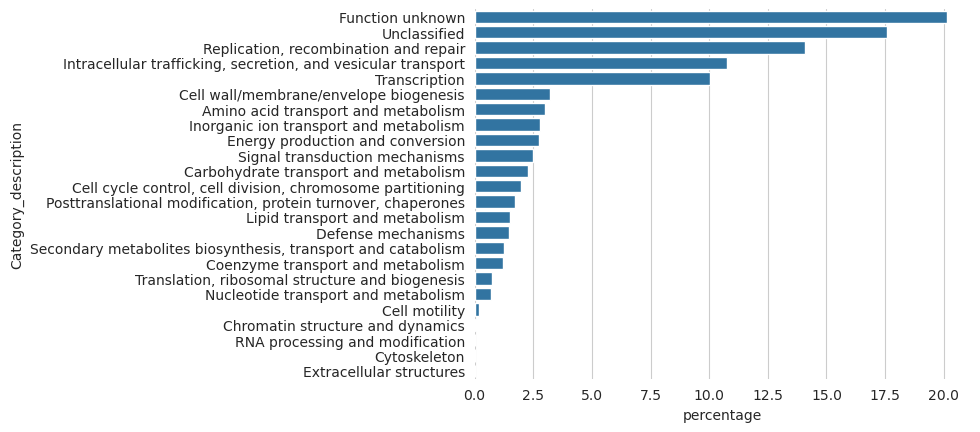

In [28]:
fig, ax = plt.subplots()
sns.barplot(
    data=categories_df.filter(pl.col("Origin") == "Meta").sort(
        by="percentage", descending=True
    ),
    x="percentage",
    y="Category_description",
    estimator="sum",
    errorbar=None,
)
sns.despine(left=True, bottom=True)
#fig.savefig("../figures/cog_categories_meta.pdf", bbox_inches="tight")

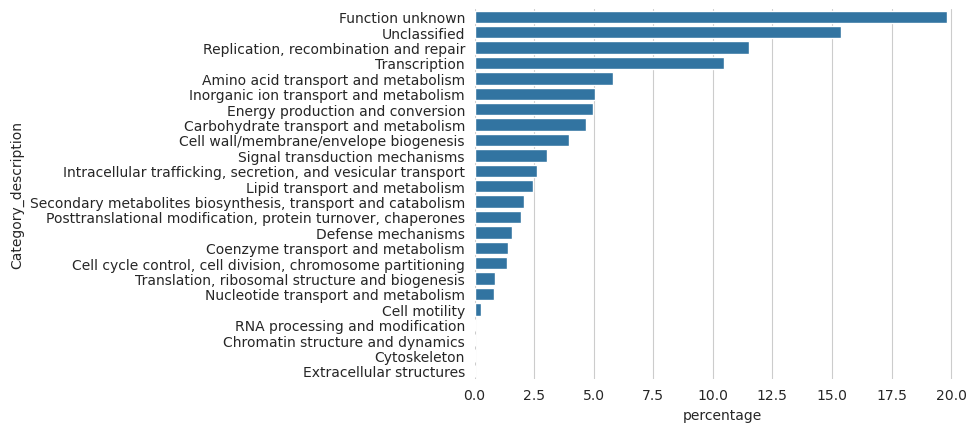

In [29]:
fig, ax = plt.subplots()
sns.barplot(
    data=categories_df.filter(pl.col("Origin") == "Isolate").sort(
        by="percentage", descending=True
    ),
    x="percentage",
    y="Category_description",
    estimator="sum",
    errorbar=None,
)
sns.despine(left=True, bottom=True)
#fig.savefig("../../figures/cog_categories_isolate.pdf", bbox_inches="tight")